If we're making the fin frames with a router/2-axis mill, we need to know what angle of chamfer cutter to use.  
This is just the trig to make sure that the angle of the leading edge is $\leq$ the mach angle.

In [1]:
import math as m
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

The left triangle is the upper half of a streamwise cross section of the leading edge. ($\mu$ is the mach angle)  
The diagram in the middle shows the leading edge, as it would be shown in the planform.  
The triangle on the right shows a cross section perpendicular to the leading edge of the fin.


![](leadingEdgeTrig.jpg)

define a function to go from the designed mach number to the required included angle of the cutter

In [2]:
def thetaI(M=2, thick=1/8):
#    thick   = 1/8
#    M       = 2
    thetaMu = m.asin(1/M)
    deltaY  = thick/(2*m.tan(thetaMu))
    thetaS  = m.atan(9/6.42)
    deltaE  = deltaY*m.sin(m.pi/2-thetaS)
    thetaE  = m.atan(thick/(2*deltaE))
    thetaI  = m.pi-2*thetaE
    return thetaI

In [3]:
print(thetaI()*360/2/m.pi)

90.33389729002562


Ideally, the included angle of the cutter should be thetaI or less.  
Any more and we get an oblique shock at the leading edge.  

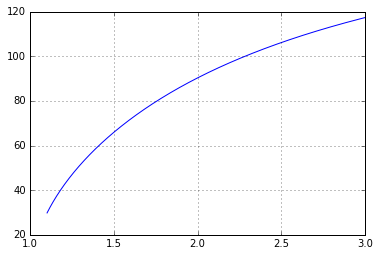

In [4]:
Ms= np.linspace(start=1.1, stop=3, num=1e3)
thetas= [thetaI(M)*360/2/m.pi for M in Ms]
plt.plot(Ms, thetas)
plt.grid()

The plot above shows the relationship between mach number and the minimum required included angle of the cutter. 

For a cutter with an included angle of 120 degrees, check that a 1/4" diameter is okay:

In [5]:
thick= 1/8
thetaI= 120/360*m.pi*2
thetaE= m.pi/2-thetaI/2
# tan(thetaE)=thick/2/deltaE
deltaE= thick/2/m.tan(thetaE)
print(thick)
print(thetaI*360/2/m.pi)
print(thetaE*360/2/m.pi)
print(deltaE)
print(deltaE*2)

0.125
119.99999999999999
30.000000000000004
0.10825317547305481
0.21650635094610962
